<h1>Exercise 2</h1>
<h2>1. Pandas</h2>
Dataset Exploration: Download Gasprices.csv. This dataset contains information about the sales of gas stations across a city along with other attributes. You will analyze this dataset using pandas library and plot some interesting information using the matplotlib library.

- Load the data using pandas.
- Summarize each NUMERIC field in the data, i.e., mean, average, etc.

In [521]:
import pandas as p
global gasPrices
gasPrices = p.read_csv('/Users/antondoluda/Documents/AML/AML_Assignment_2/GasPrices.csv')
gasPrices.describe()

Unnamed: 0          ID       Price       Pumps   Gasolines  \
count  101.000000  101.000000  101.000000  101.000000  101.000000   
mean    51.000000   51.000000    1.864257    6.950495    3.465347   
std     29.300171   29.300171    0.081515    3.925242    0.557931   
min      1.000000    1.000000    1.730000    2.000000    1.000000   
25%     26.000000   26.000000    1.790000    4.000000    3.000000   
50%     51.000000   51.000000    1.850000    6.000000    3.000000   
75%     76.000000   76.000000    1.920000    8.000000    4.000000   
max    101.000000  101.000000    2.090000   24.000000    4.000000   

            Zipcode         Income  
count    101.000000     101.000000  
mean   78730.782178   56727.217822  
std       22.054298   25868.359804  
min    78701.000000   12786.000000  
25%    78704.000000   37690.000000  
50%    78731.000000   52306.000000  
75%    78752.000000   70095.000000  
max    78759.000000  128556.000000

- Group data by the field Name.
    - Find the average price, average income, and average number of pumps for each group.

In [522]:
gasPrices_grouped = gasPrices.groupby('Name').agg({
    'Price': 'mean',  
    'Income': 'mean',
    'Pumps': 'mean'
})
gasPrices_grouped

Price        Income      Pumps
Name                                                      
7-Eleven                 1.887778  53432.333333   4.666667
Around the Corner Store  1.940000  63750.000000   2.000000
Chevron                  1.871818  61754.636364   8.727273
Citgo                    1.835000  49387.000000   4.000000
Conoco                   1.890000  43545.500000   4.000000
Costco                   1.730000  70095.000000  12.000000
Double R Grocery         1.790000  37690.000000   4.000000
East 1st Grocery         1.770000  37690.000000   4.000000
Exxon                    1.855000  52344.333333  11.500000
Gulf                     1.788571  50084.142857   5.714286
HEB Fuel                 1.790000  36903.500000  11.000000
Kool Corner              1.790000  42615.000000   4.000000
Lamar Corner Store       1.890000  37396.000000   2.000000
Major Brand Gas          1.790000  60856.000000   4.000000
Mobil                    1.865000  47460.500000  12.000000
Phillips 66              1.890000  59796.500000   7.000000
Shell                    1.883793  62972.793103   6.482759
Signature Fuels          1.795000  61200.500000   5.000000
Texaco                   1.912000  75105.800000   5.600000
Valero                   1.891429  49049.000000   6.285714

- Use a boxplot that visualizes the statistical information about (price, pumps, gasoline)

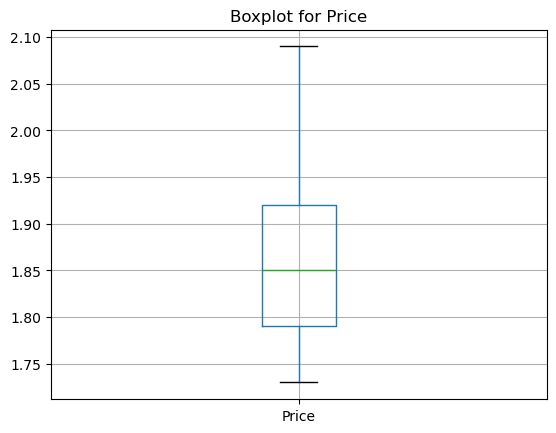

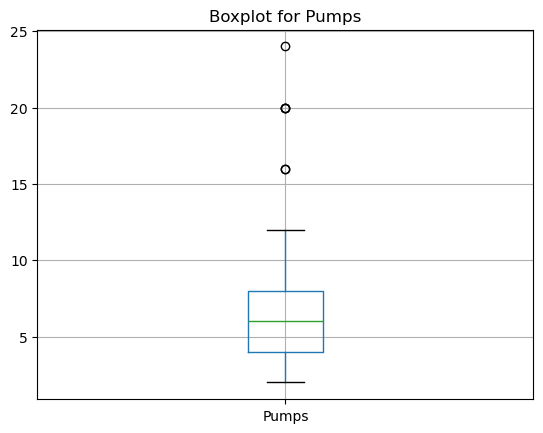

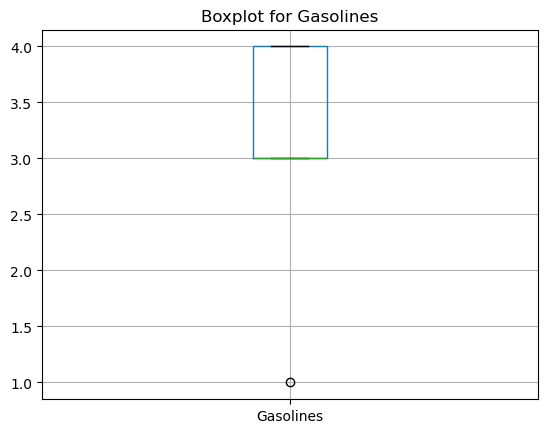

In [523]:
import matplotlib.pyplot as plt
gasPrices.boxplot(['Price'])
plt.title('Boxplot for Price')
plt.show()
gasPrices.boxplot(['Pumps'])
plt.title('Boxplot for Pumps')
plt.show()
gasPrices.boxplot(['Gasolines'])
plt.title('Boxplot for Gasolines')
plt.show()

- Use the Price and Income features to plot a prediction line similar to the first exercise.

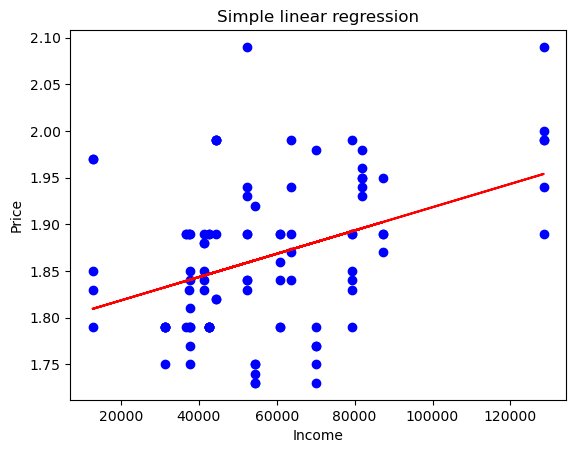

In [524]:
import numpy as np
global x, y, x_mean, y_mean
x = gasPrices['Income']
y = gasPrices['Price']
x_mean = np.mean(x)
y_mean = np.mean(y)

plt.scatter(x, y, color='blue')

def learn_simple_linear_regression(x, y):
    beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    beta_0 = y_mean - beta_1 * x_mean
    return beta_0, beta_1

def predict_using_simple_linear_regression(x, beta_0, beta_1):
    return beta_0 + beta_1 * x

beta_0, beta_1 = learn_simple_linear_regression(x, y)
y_pred = predict_using_simple_linear_regression(x, beta_0, beta_1)

plt.plot(x, y_pred, color = 'red', label='Predicted line')
plt.xlabel('Income')
plt.ylabel('Price')
plt.title('Simple linear regression')
plt.show()

Normalize the Income (implement this yourself) and plot the line again. Comment on the difference between the two plots.

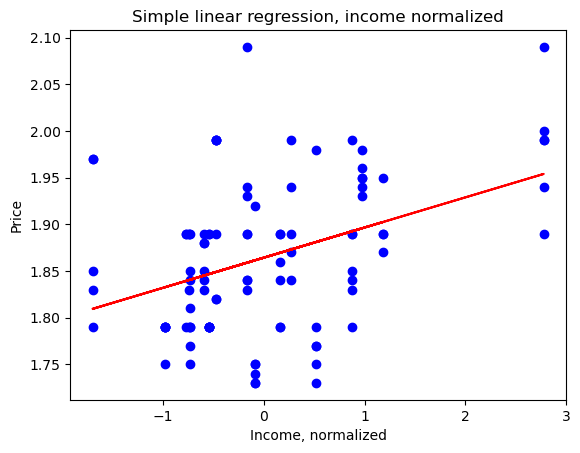

In [525]:
gasPrices['Income_normalized'] = (x - x_mean) / x.std()
x_new = gasPrices['Income_normalized']
x_new_mean = np.mean(x_new)

plt.scatter(x_new, y, color='blue')

def learn_simple_linear_regression(x_new,y):
    beta_1 = np.sum((x_new - x_new_mean) * (y - y_mean)) / np.sum((x_new - x_new_mean)**2)
    beta_0 = y_mean - beta_1 * x_new_mean
    return beta_0, beta_1

def predict_using_simple_linear_regression(x_new, beta_0, beta_1):
    return beta_0 + beta_1 * x_new

beta_0, beta_1 = learn_simple_linear_regression(x_new, y)
y_pred = predict_using_simple_linear_regression(x_new, beta_0, beta_1)

plt.plot(x_new, y_pred, color = 'red', label='Predicted line')
plt.xlabel('Income, normalized')
plt.ylabel('Price')
plt.title('Simple linear regression, income normalized')
plt.show()

The two plots look completely the same, the only difference is the values of the incomes. The first plot picture the actual values of the income, while the second one 

<h2>2. Linear Regression via Normal Equations</h2>
In this exercise, you will implement (multiple) linear regression using Normal Equations. The learning algorithm is below.

- Reuse the Gasprices.csv dataset. Load it as Xdata.
- Choose columns that help with prediction (i.e., contain useful information). Drop irrelevant columns, and explain your reasoning for choosing or dropping any column.
- Split your dataset Xdata, Ydata into Xtrain, Ytrain, and Xtest, Ytest (randomly assign 80% to Xtrain, Ytrain and the remaining 20% to Xtest, ytest).

In [526]:
from sklearn.model_selection import train_test_split #TODO

Xdata = p.read_csv('/Users/antondoluda/Documents/AML/AML_Assignment_2/GasPrices.csv')
Ydata = Xdata['Price']
Xdata = Xdata.drop(['Unnamed: 0', # an index => irrelevant for price
                    'ID', # an index => irrelevant for price
                    'Address', # Address might be relevant for price prediction, but there is Zipcode that does it already => redundant
                    'Brand', # Brand is also redundant as there is already Name
                    'Price'], # Price is Y
                    axis=1) # axis=1 for columns
Xdata = p.get_dummies(Xdata, drop_first=True)
global Xtrain, Xtest, Ytrain, Ytest
Xtrain, Xtest, Ytrain, Ytest  = train_test_split(Xdata, Ydata, test_size=0.2, random_state=42) # random_state=42 for reproducibility

- Implement the learn-linreg-NormEq algorithm and learn a parameter vector β using the Xtrain set. You need to learn a model to predict the sales price of houses, i.e., ytest.

In [527]:
global method

In [528]:
# using pseydocode from wikipedia https://de.wikipedia.org/wiki/Cholesky-Zerlegung
def SOLVE_SLE_cholesky(A, b):
    n = A.shape[0]
    L = np.full_like(A, 1e-3)
    for i in range(n):  # row
        for j in range(i + 1):  # column
            sum_value = A[i, j]  

            for k in range(j):
                sum_value -= L[i, k] * L[j, k]
                
            if i > j:
                L[i, j] = sum_value / L[j, j]  # lower triangle
            else:
                if sum_value > 0:
                    L[i, i] = np.sqrt(sum_value)
                else:
                    print(L[i, i])
                    raise ValueError("Negative value encountered in diagonal calculation.")

    
    # L * y = b
    y = np.full(n, 1e-3)
    for i in range(n):
        sum_products = np.dot(L[i, :i], y[:i])
        y[i] = (b[i] - sum_products) / L[i, i]
    
    # L^T * x = y
    x = np.full(n, 1e-3)
    for i in range(n - 1, -1, -1):
        sum_contributions = np.dot(L[i + 1:, i], x[i + 1:])
        x[i] = (y[i] - sum_contributions) / L[i, i]

    return x

In [529]:
# R*x = Q^T * b
def SOLVE_SLE_qr(A, b):
    m, n = A.shape
    Q = np.zeros((m, n))  # Initialize orthogonal matrix Q
    R = np.zeros((n, n))  # Initialize upper triangular matrix R
    for j in range(n):
        v = A[:, j] # j-th column
        
    for i in range(j):
        R[i, j] = np.dot(Q[:, i], A[:, j])  # projection length
        v -= R[i, j] * Q[:, i]  # Subtract the projection from v
            
    # normalize v
    R[j, j] = np.linalg.norm(v)
    if R[j, j] > 0:
        Q[:, j] = v / R[j, j]
        Qt_b = np.dot(Q.T, b)  # Q^T * b
    
    x = np.zeros(n) 

    # Back substitution
    for i in range(n - 1, -1, -1):
        sum = np.dot(R[i, i + 1:], x[i + 1:]) # Calculate the sum of known x values
        x[i] = (Qt_b[i] - sum) / R[i, i] # current

    return x

In [530]:
def SOLVE_SLE_gaussian_elimination(A, b):
    n = len(A)  # rows
    m = A.shape[1]  # columns
    A_b = np.append(A, b.reshape(-1, 1), axis=1)

    # Row Echelon Form (REF)
    for i in range(n):  # Alle Zeilen
        if A_b[i, i] == 0:
            for k in range(i + 1, n):
                if A_b[k, i] != 0:
                    temp = A_b[i].copy()
                    A_b[i] = A_b[k]
                    A_b[k] = temp
                    break

        # diagonal 1
        if A_b[i, i] != 0:
            A_b[i] = A_b[i] / A_b[i, i]

        # Zeros under the leading coefficient
        for j in range(i + 1, n):
            A_b[j] = A_b[j] - A_b[j, i] * A_b[i]

    # Backsubst
    temp = np.zeros(n)  
    for i in range(n - 1, -1, -1):  # start with the last row
        if np.all(A_b[i, :-1] == 0): 
            continue

        curr = A_b[i, -1]
        for j in range(i + 1, n):
            curr -= A_b[i, j] * temp[j]

        temp[i] = curr

    return temp

In [531]:
def prepare_data_for_cholesky(A, b):
    A = (A - np.min(A, axis=0)) / (np.max(A, axis=0) - np.min(A, axis=0)) # Min-Max Normalization

    num_rows, num_cols = A.shape
    size = max(num_rows, num_cols)
    square_matrix = np.full((size, size), 1e-6)  # Initialisiere mit epsilon
    square_matrix[:num_rows, :num_cols] = A  # Fülle mit Werten aus A
    
    np.fill_diagonal(square_matrix, square_matrix.diagonal() + 1e-6)

    if b.shape[0] < size:
        b_extended = np.full(size, 1e-6)
        b_extended[:len(b)] = b
        b = b_extended

    return square_matrix, b

In [532]:
def SOLVE_SLE(A, b, method):
    if method == 'cholesky':
        A, b = prepare_data_for_cholesky(A, b)
        print(A)
        print(b)
        return SOLVE_SLE_cholesky(A, b)
    elif method == 'qr':
        return SOLVE_SLE_qr(A, b)
    elif method == 'gaussian':
        return SOLVE_SLE_gaussian_elimination(A, b)
    else:
        raise ValueError("Method must be 'gaussian', 'cholesky' or 'qr'.")
    
def Learn_LinReg_NormEq(X, y, method):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    X_T = X_b.transpose()
    A = np.dot(X_T, X_b)  # X^T * X_b
    b = np.dot(X_T, y)    # X^T * y
    beta = SOLVE_SLE(A, b, method)
    return beta

In [533]:
gaussian_model = Learn_LinReg_NormEq(Xdata, Ydata, method = 'gaussian')
cholesky_model = Learn_LinReg_NormEq(Xdata, Ydata, method = 'cholesky')
qr_model = Learn_LinReg_NormEq(Xdata, Ydata, method = 'qr')

[[1.35757564e-05 1.26651004e-05 1.26653017e-05 ... 1.27014772e-05
  1.27016125e-05 1.27016417e-05]
 [8.81560521e-05 1.17120878e-04 9.00361418e-05 ... 8.95151725e-05
  7.04734628e-05 8.84034265e-05]
 [4.38893897e-05 4.48706416e-05 4.61087966e-05 ... 4.49591970e-05
  4.22021318e-05 4.49638118e-05]
 ...
 [7.79696894e-06 7.99710628e-06 8.05643833e-06 ... 1.37014772e-05
  0.00000000e+00 8.63711638e-06]
 [3.77272691e-06 3.07581011e-06 3.70160680e-06 ... 0.00000000e+00
  1.37016125e-05 3.81049252e-06]
 [6.16212061e-06 6.26017822e-06 6.38708624e-06 ... 6.85476546e-06
  6.14594153e-06 1.37016417e-05]]
[188.29000000000002 1304.2800000000002 653.2400000000002
 14824216.509999992 10764703.350000001 1.94 20.59 7.34 3.7800000000000002
 1.73 1.79 1.77 22.259999999999998 12.52 3.58 1.79 1.89 1.79 3.73
 3.7800000000000002 54.629999999999995 3.59 9.559999999999999 13.24
 165.35000000000008 15.32 33.17 41.800000000000004 175.03000000000003
 117.36999999999998 57.66 92.61999999999999]
0.001


ValueError: Negative value encountered in diagonal calculation.